In [2]:
!pip install spacy transformers streamlit pytesseract pandas numpy matplotlib    

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.8 MB 1.5 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.8 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/11.8 MB 2.8 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.8 MB 3.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.2/11.8 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.8 MB 4.0 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-community 0.3.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Loading

In [4]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = "D:\\Resume Parser\\data\\raw\\UpdatedResumeDataSet.csv"
try:
    resume_data = pd.read_csv(file_path)
    print("Data Loaded Successfully!")
    display(resume_data.head())  # Display first few rows in a nice tabular format
except Exception as e:
    print("Error loading data:", e)


Data Loaded Successfully!


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Preprocessing

In [11]:
# Import libraries for preprocessing
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# Define a text cleaning function
def clean_text(text):
    """
    Clean text data by removing special characters, stopwords, and extra spaces.
    """
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = " ".join([word.lower() for word in text.split() if word.lower() not in stop_words])
    return text

# Preprocess the data
resume_data = resume_data.drop_duplicates()  # Remove duplicate entries
resume_data = resume_data.dropna()  # Drop rows with missing values
resume_data["Cleaned_Resume"] = resume_data["Resume"].apply(clean_text)  # Clean the 'Resume' column

# Display preprocessed data
display(resume_data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Resume,Fixed_Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E ...,education details may 2013 may 2017 uitrgpv da...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad,...",education details mca ymcaust faridabad haryan...


In [13]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Visulaization

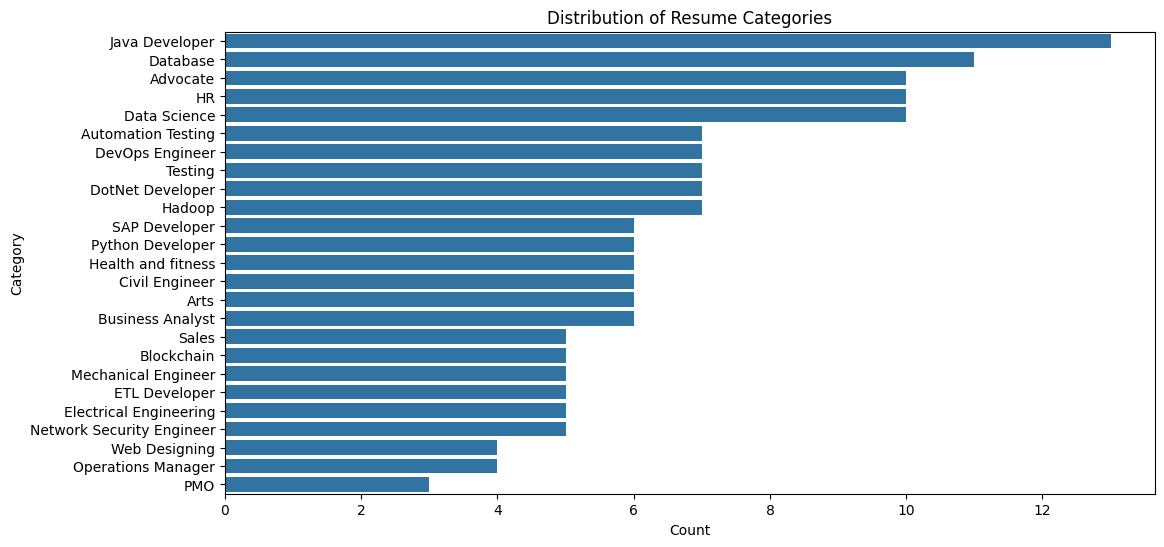

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of resume categories
plt.figure(figsize=(12, 6))
sns.countplot(y="Category", data=resume_data, order=resume_data["Category"].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()



## Feature Extraction
We'll use two popular methods for text feature extraction:

TF-IDF Vectorization (Term Frequency-Inverse Document Frequency): Captures the importance of a word relative to a document and the dataset.

Word Embeddings: to use advanced models like BERT later.

In [19]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 6.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 6.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.0 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 6.2 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 6.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 6.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorization 
tfidf = TfidfVectorizer(max_features=3000)  # Limit to top 3000  features

# fIT and transform the cleaned resumed data
X= tfidf.fit_transform(resume_data["Cleaned_Resume"])

# Convert the sparse matrix to a dense dataframe for easier visulaizayiom
tfidf_features = pd.DataFrame(X.toarray(),columns=tfidf.get_feature_names_out())

# Dispaly the TFIDF features matrix
print("shape of TF-IDF matrix:, tfidf_features.shape")
tfidf_features.head()

shape of TF-IDF matrix:, tfidf_features.shape


,01,02,10,100,10g,11,11g,12,120,12c,...,ymca,york,young,yrs,zaggle,zensar,zero,zhypility,zone,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.082523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077525,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label Encoding
To prepare for classification, encode the "Category" column as numerical labels:

In [21]:
from sklearn.preprocessing import LabelEncoder
#Initialize the Label Encoders
label_encoder = LabelEncoder()

# Transform the "Category" column into numericals labels
y = label_encoder.fit_transform(resume_data["Category"])

# Display encoded labels and their mappings
print("Encoded Labels:", y[:5])
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded Labels: [6 6 6 6 6]
Label Mapping: {'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


## Training a Model
Now that we have the TF-IDF features (X) and encoded labels (y), we can train a classification model. For simplicity, we'll start with a Logistic Regression model. It’s a good baseline for text classification tasks.

In [22]:
from sklearn.model_selection import train_test_split

# Split data into trai ing and test ses
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (132, 3000)
Testing set size: (34, 3000)


## Train a Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       1.00      0.40      0.57         5
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         2
          15       0.05      1.00      0.10         1
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
   

C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.6400

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      1.00      0.80         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         1
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       0.50      0.80      0.62         5
          13       1.00      0.67      0.80         3
          14       1.00      0.50      0.67         2
          15       0.29      1.00      0.44         2
          16       0.00      0.00      0

C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

## XGBoost

In [25]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.5 MB/s eta 0:01:25
    --------------------------------------- 1.6/124.9 MB 2.0 MB/s eta 0:01:01
    --------------------------------------- 2.4/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 3.7/124.9 MB 3.3 MB/s eta 0:00:37
   - -------------------------------------- 3.9/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 3.9/124.9 MB 3.4 MB/s eta 0:00:36
   - -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import xgboost as xgb
# Train an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)



C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2
           3       0.50      1.00      0.67         1
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.75      0.60      0.67         5
          13       1.00      0.33      0.50         3
          14       0.50      0.50      0.50         2
          15       1.00      1.00      1.00         2
          16       0.50      1.00      0.67         1
          17       0.67      1.00      0.80 

C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## Hyperparameter Tuning
to improve your model further, tune the hyperparameters of XGBoost using GridSearchCV.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV for tuning XGBoost hyperparameters
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3, verbose=1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Retrain the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
print("Accuracy of tuned model:", accuracy_score(y_test, y_pred_best))
print("Classification Report of tuned model:")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:09:38] WARN

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy of tuned model: 0.7
Classification Report of tuned model:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2
           3       0.33      1.00      0.50         1
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.75      0.60      0.67         5
          13       1.00      0.33      0.50         3
          14       0.50      0.50      0.50         2
          15       1.00      1.00      1.00  

C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ramme\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Accuracy: 70% of the predictions were correct on the test set.

# Resume Parsing with OCR

The resumes are in image formats (like PDFs or scanned documents), its need to use OCR (Optical Character Recognition) to extract the text before passing it to your classifier.

Libraries to use:

Tesseract: Tesseract is a popular OCR engine that can be used with Python to extract text from images or PDFs. You can also use pytesseract, a Python wrapper for Tesseract.

pdf2image: To handle PDFs, you can first convert the PDF pages into images and then use OCR on these images.

In [34]:
!pip install pytesseract pdf2image


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pytesseract
from pdf2image import convert_from_path


# convert PDF to images
images = convert_from_path('D:\\Resume Parser\\Ram Resume.pdf')

# use pytesseract to extract to extract text from each image

text = ""
for image in images:
    text += pytesseract.image_to_string(image)

print(text)

RAMDULAR YADAV

Data Science J +977 9819936338
@ rammey115@gmail.com
Computer Engineering © in

IOE Purwanchal Campus, Dharan, Nepal

Passionate Data Science and AI/ML Engineer with expertise in Machine Learning, Deep learning, and Data-
Driven solutions. Skilled in Python, mathematics, and problem-solving, with a strong foundation in Proba-
bility and Statistics. As a dedicated Data Analyst, I thrive on transforming data into actionable insights and
contifuously learning new technologies to drive innovation.

TECHNICAL SKILLS

Expertise: Machine & Deep Learning, Computer Vision, Image Processing, Generative AI (GANs), LLMs, Retrieval-
Augmented Generation (RAG), Fine-Tuning, Prompt Engineering, SQL, Databases.

Languages: Python, C++, SQL, HTML/CSS, Shell, Bash.
Developer Tools: VS Code, Colab, Jupyter Notebook, Anaconda, GPT/LLM API integrations, Hugging Face.
Technologies: GitHub, Excel, LaTeX, Database Management (MySQL).

Libraries: Matplotlib, Seaborn, Pandas, Numpy, Scikit-learn

## Clean the extracted OCR Text

In [28]:
import re



def clean_text(raw_text):
    """
    Clean OCR-extracted text by removing unwanted characters, multiple line breaks, and whitespaces.
    """
    # Replace multiple newlines with a single space
    cleaned_text = re.sub(r'\n+', ' ', raw_text)
    
    # Remove special characters except basic punctuation
    cleaned_text = re.sub(r'[^\w\s,.]', '', cleaned_text)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Clean the extracted text
cleaned_text = clean_text(text)

print("Original OCR Text:")
print(text)
print("\nCleaned Text:")
print(cleaned_text)


Original OCR Text:
RAMDULAR YADAV

Data Science J +977 9819936338
@ rammey115@gmail.com
Computer Engineering © in

IOE Purwanchal Campus, Dharan, Nepal

Passionate Data Science and AI/ML Engineer with expertise in Machine Learning, Deep learning, and Data-
Driven solutions. Skilled in Python, mathematics, and problem-solving, with a strong foundation in Proba-
bility and Statistics. As a dedicated Data Analyst, I thrive on transforming data into actionable insights and
contifuously learning new technologies to drive innovation.

TECHNICAL SKILLS

Expertise: Machine & Deep Learning, Computer Vision, Image Processing, Generative AI (GANs), LLMs, Retrieval-
Augmented Generation (RAG), Fine-Tuning, Prompt Engineering, SQL, Databases.

Languages: Python, C++, SQL, HTML/CSS, Shell, Bash.
Developer Tools: VS Code, Colab, Jupyter Notebook, Anaconda, GPT/LLM API integrations, Hugging Face.
Technologies: GitHub, Excel, LaTeX, Database Management (MySQL).

Libraries: Matplotlib, Seaborn, Pandas, 

##  Perform Named Entity Recognition (NER)
Enhancing the classification model using Named Entity Recognition (NER) can help extract structured information from the resume, such as:

Names

Education

Skills

Work Experience

spaCy and BERT can help with NER. Here's how you can use each:

Using spaCy for NER
SpaCy is an excellent library for natural language processing that provides pre-trained models for Named Entity Recognition. First, install spaCy and download the pre-trained model:

In [19]:
!pip install spacy
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 8.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 6.7 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 6.4 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 6.3 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 6.1 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 6.2 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 6.2 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 6.2 MB/s eta 0:00:01
     ---------------------------------- ----- 11.0/12.8 MB 6.3 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 6.2 MB/


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    """
    Extract named entities from the given text using spaCy's NER model.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Perform NER on the cleaned text
entities = extract_entities(cleaned_text)

print("\nExtracted Entities:")
for entity, label in entities:
    print(f"{label}: {entity}")



Extracted Entities:
ORG: RAMDULAR YADAV Data Science J 977 9819936338
ORG: Computer Engineering
PERSON: Purwanchal Campus
GPE: Dharan
ORG: Nepal Passionate Data Science
GPE: Machine Learning
ORG: Data Driven
GPE: Python
GPE: Proba
ORG: Statistics
ORG: Data
ORG: Image Processing
PERSON: Generative AI
ORG: FineTuning
ORG: Prompt Engineering
ORG: SQL
GPE: Databases
ORG: Languages Python
ORG: HTMLCSS
ORG: Shell
GPE: Bash
PERSON: Jupyter Notebook
GPE: Anaconda
ORG: API
ORG: Hugging Face
PRODUCT: Excel
ORG: LaTeX
ORG: Database Management
PERSON: Libraries Matplotlib
NORP: Seaborn
PERSON: Pandas
ORG: Numpy, Scikitlearn, Tensorflow, Pytorch
GPE: Flask
PERSON: Frameworks Tensorflow
ORG: Hugging Face
PERSON: Softskills Leadership
ORG: Management, Teamwork
ORG: Communication
ORG: Analytical Problemsolving PROJECTS
PERSON: Chatbot Developed
ORG: LangChain
DATE: LLaMA
DATE: LLaMA
ORG: LangChain
PRODUCT: Flick8k
CARDINAL: 150
ORG: EDA
WORK_OF_ART: KNeighborsRegressor
ORG: AdaBoostRe
ORG: Linear Reg

In [34]:
import json

# Convert to JSON
with open("resume_entities.json", "w") as f:

    json.dump(entities, f, indent=4)

print("\nEntities saved to resume_entities.json!")



Entities saved to resume_entities.json!
